### Read sample data

The test last for 30 minutes, there are a total of 2 - 4 channels to be measured. Measurement is done every 20 seconds on all channels. Currently we have 2 channel, but in the future we will have 4 channel.

At each measuremnt, a total of 120 data point is collected. Measurement on 1 channel normally takes less than 1-2 seconds.

This sample data is the data collected on 1 channel during the test. It is a list of 90 measurements. For each measurement, it consits of a start/end potential for this measurement and 120 current data.

For example, the first measurement: 

```
[
    [
      -0.407,
      0.193
    ],
    [
      7.952,
      9.462,
      9.058,
      .
      .
      .
    ],
    ...
```

The starting potential is -.407V, ending potential is 0.193V, 120 data point is collected. Current values are 7.952... etc.

In [1]:
# load the data.
# you can change './sample.json' to your own JSON data file.
# the sample json data is using a non-standard affix because of my gitignore.
import json
# data = json.load(open('./sample.json.txt'))
data = json.load(open('./exportData/negative2.json.txt'))

### Data format

In [2]:
# the totoal time points of the data:
print(f'There are a total of {len(data)} measurements.')

print(f'The start and ending potential of the first measurement is {data[0][0][0]}V and {data[0][0][1]}V.')

print(f'The first measurement result: {data[0][1]}')
print(f"The first measurement result's length is {len(data[0][1])}")

There are a total of 90 measurements.
The start and ending potential of the first measurement is -0.422V and 0.178V.
The first measurement result: [12.361, 14.037, 13.367, 12.771, 12.184, 11.739, 11.247, 10.823, 10.404, 9.947, 9.614, 9.268, 8.811, 8.517, 8.223, 8.016, 7.761, 7.545, 7.29, 7.092, 6.932, 6.729, 6.491, 6.435, 6.327, 6.28, 6.193, 6.159, 6.137, 6.116, 6.198, 6.237, 6.28, 6.448, 6.66, 6.975, 7.29, 7.683, 8.102, 8.586, 9.195, 9.813, 10.404, 11.229, 12.076, 13.078, 14.356, 15.358, 16.373, 17.474, 18.74, 19.91, 20.696, 21.668, 22.575, 23.366, 24.553, 24.825, 24.903, 24.938, 24.843, 24.519, 23.841, 23.167, 22.623, 21.932, 21.634, 20.459, 19.362, 18.191, 16.913, 15.367, 13.967, 12.378, 10.884, 9.592, 8.69, 7.532, 6.72, 6.103, 5.558, 5.204, 4.967, 4.725, 4.582, 4.444, 4.561, 4.505, 4.5, 4.539, 4.535, 4.569, 4.66, 4.682, 4.721, 4.738, 4.911, 4.911, 5.019, 5.109, 5.144, 5.204, 5.33, 5.334, 5.403, 5.541, 5.649, 5.727, 5.861, 5.934, 5.99, 6.129, 6.258, 6.245, 6.362, 6.517, 6.638, 6.729

In [3]:
### show one of the data and the format to be returned from M355
index = -1
print('One of the returned repsonse from M355 is:')
print(json.dumps({"r":data[index][1]},separators=(',',':')) + '*')

One of the returned repsonse from M355 is:
{"r":[11.402,12.594,12.179,11.812,11.38,10.901,10.603,10.266,9.908,9.657,9.424,9.087,8.867,8.716,8.461,8.258,8.141,7.951,7.761,7.61,7.498,7.286,7.174,7.07,6.902,6.789,6.733,6.612,6.53,6.517,6.483,6.448,6.457,6.517,6.548,6.668,6.841,7.014,7.234,7.597,7.774,8.258,8.806,9.394,10.003,10.594,11.847,12.547,13.419,14.438,15.229,16.222,17.28,18.135,18.9,19.591,20.463,20.541,20.753,20.791,20.407,20.174,19.889,19.431,19.042,18.628,18.282,17.621,16.999,16.313,15.302,14.507,13.721,12.68,11.817,10.914,10.076,9.173,8.448,7.67,7.049,6.604,6.245,5.9,5.71,5.589,5.602,5.541,5.528,5.524,5.524,5.606,5.71,5.844,6.042,6.129,6.431,6.552,6.772,6.966,7.122,7.416,7.636,7.869,8.171,8.327,8.802,9.087,9.299,9.502,9.623,9.873,10.033,10.232,10.491,10.448,10.892,10.983,11.078,11.039]}*


This is how the raw data looks:


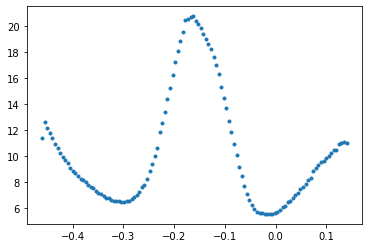

In [4]:
### plot the raw data
from util import plotFit
import numpy as np
index = -1
potentials = np.linspace(*data[index][0],len(data[index][1]))
currents = data[index][1]
print('This is how the raw data looks:')
plotFit(potentials,currents)

### perform data analysis to find the measurement value at each measurement

The operation is done in real time, whenever a measurement is finished, the raw data is processed to generate the fitting result. The raw data can be discarded, only store the fitting result.



In [5]:
# the peak fitting algorithm is in the util module. 
# you can look in to details. 
# certain algorithms from python packages are used. We need to migrate those algorithms as well.

from util import myfitpeak,plotFit
from util import *
import numpy as np

fits = []
for v,a in data:
    fits.append(myfitpeak(np.linspace(*v,len(a)),a))


In [ ]:
print(json.dumps(fits[-1],indent=2))

### Fitting result
- `pc` is the peak high in the figure below.(green verticle line). This is the value we use for downstream calling.
- `fx, fy` are the cordinates of the peak base. (left and right intersection point of the orange line)
- `pv` is the peak center.
- `err` is a estimation of how close the peak is to a normal distribution. 

This is demonstrating how the raw measurement and one of fitting result looks like:


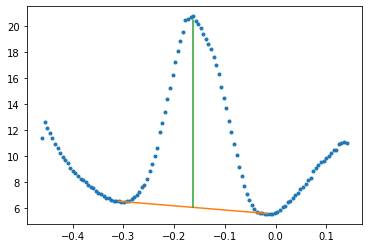

In [6]:
# This is demonstrating how the raw measurement and one of fitting result looks like 
print('This is demonstrating how the raw measurement and one of fitting result looks like:')
index = -1
potentials = np.linspace(*data[index][0],len(data[index][1]))
currents = data[index][1]
plotFit(potentials , currents, fits[index] )

### Perform the result calling from the time course result

The `pc` value at each measurement from the previous step is used to predict whether the channel is positive or negative.

In [ ]:
# Here is how the time course curve normally looks like
# plotting is just for show here.
import matplotlib.pyplot as plt
plt.plot( np.linspace(0,30,len(fits)) ,  [i['pc'] for i in fits], '.')
plt.ylabel('PC / uA')
plt.xlabel('Time / minutes')
plt.title('Time course of PC of one channel')
plt.show()

In [ ]:
from util import hCtTPredictT,convert_list_to_X

# t is the time points, the measurement is taken over 30 minutes, and a total of len(fits) measurements.
t = np.linspace(0,30,len(fits))
# c is all the `pc` in fitting result
c = [i['pc'] for i in fits]
data = [[t,c]]

# the convert_list_to_X is just to transform the data to the shape that works with the scipy pipeline.
X = convert_list_to_X(data)

# hCtPredictT is the pipeline that transforms and fits the data to give calling result.
result = hCtTPredictT.transform(X)

call, Ct, prominance, signal_drop = result[0]

print(f"The result is {'Positive' if call else 'Negative'}.")
print(f"The reaction Ct is {Ct:.2f} minutes.")
print(f"The prominance is {prominance:.4f}.")
print(f"The signal drop is {signal_drop:.4f}.")

### You can look into the `hCtTPredictT` pipeline to see what calculations are done.

The calculations utilizes some python packages, these functions need to be migrated.

In [ ]:

smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
    ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('remove time', RemoveTime()),
])
smoothed_X = smoothT.transform(X)

deriT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
    ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('Derivitive', Derivitive(window=31, deg=3)),
    # ('remove time',RemoveTime()),
])
deri_X = deriT.transform(X)



hCtT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
    ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('Derivitive', Derivitive(window=31, deg=3,deriv=1)),
    ('peak', FindPeak()),
    ('logCt',HyperCt(offset=0.05)),
    
])
hCtT_X = hCtT.transform(X)

hCtTPredictT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
    ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('Derivitive', Derivitive(window=31, deg=3)),
    ('peak', FindPeak()),
    ('logCt',HyperCt(offset=0)),
    ('predictor',CtPredictor(ct=22,prominence=0.22,sd=0.05))
])
hCtpred_X = hCtTPredictT.transform(X)


In [ ]:

col = 1
row = 1
print(f'Generating curve plots in a {row} x {col} Grid')
fig, axes = plt.subplots(row, col, figsize=(col*4, row*3))

i=0
ax = axes
# ax.set_ylim([0,1.3])

smoothed_c = smoothed_X[i]
t,deri,_ =  deri_X[i]
left_ips,peak_prominence,peak_width, *sd= hCtT_X[i]    

curvePeakRange = findTimeVal(t,smoothed_c,left_ips,peak_width)
xvals = np.linspace(t[0],t[-1],len(deri))


# hyper ct
hyperline = HyperCt.hyperF(None,hCtT_X[i][-4:-1])
hyperCt = hCtT_X[i][-1]

# plot smoothed current
ax.plot(xvals,smoothed_c,color='red')
# plot the signal drop part
ax.plot(np.linspace(left_ips,left_ips+peak_width,len(curvePeakRange)) ,curvePeakRange,linewidth=4,alpha=0.75 )
# plot plot the derivative peaks
ax.plot(xvals,(deri - np.min(deri) ) / (np.max(deri) -np.min(deri) ) * (np.max(smoothed_c)-np.min(smoothed_c)) + np.min(smoothed_c),'--',alpha=0.8)
# ax.plot(xvals,fitres(xvals),'b-.')
# ax.plot(xvals,thresholdline(xvals),'b-.',alpha=0.7)
# ax.plot([thresholdCt,thresholdCt],[0,2],'k-')

# plot hyper fitting line
ax.plot(xvals,hyperline(xvals),'k--',alpha=0.7)
ax.plot([hyperCt,hyperCt],[0.5,1.1],'k--',alpha=0.7)
    
plt.tight_layout()


In [ ]:
# print the hyper curve fit

print(json.dumps([list(xvals),list(hyperline(xvals))]))
hCtT_X[i][-4:-1]

In [ ]:
hyperline

In [ ]:
plt.plot(xvals,smoothed_X[0],'.')

In [ ]:

plt.plot(xvals,deri,'--',alpha=0.8)


In [ ]:
# smooth 
smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
  
])
smoothed_X = smoothT.transform(X)
fix,ax =plt.subplots(1,1)
ax.plot(np.linspace(0,30,90),smoothed_X[0][1],'.')
print(json.dumps([list(np.linspace(0,30,90)),list(smoothed_X[0][1])]))

In [ ]:
# smooth 
smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
  ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
])
smoothed_X = smoothT.transform(X)
fix,ax =plt.subplots(1,1)
ax.plot(np.linspace(0,30,90),smoothed_X[0][1],'.')
print(json.dumps([list(np.linspace(0,30,90)),list(smoothed_X[0][1])]))

In [ ]:
# smooth normalize and truncate
smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
  ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
  ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
])
smoothed_X = smoothT.transform(X)
fix,ax =plt.subplots(1,1)
ax.plot(xvals,smoothed_X[0][1],'.')
print(json.dumps([list(xvals),list(smoothed_X[0][1])]))

In [ ]:
# the curve after S-G filter
smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
   ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('Derivitive', Derivitive(window=31, deg=3,deriv=0)),
])
smoothed_X = smoothT.transform(X)
fix,ax =plt.subplots(1,1)
ax.plot(xvals,-smoothed_X[0][1],'.')
print(json.dumps([list(xvals),list(-smoothed_X[0][1])]))

In [ ]:
len(smoothed_X[0][1])

In [ ]:
# the curve after S-G filter and get derivative
smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
   ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('Derivitive', Derivitive(window=31, deg=3,deriv=1)),
])
smoothed_X = smoothT.transform(X)
fix,ax =plt.subplots(1,1)
ax.plot(xvals,-smoothed_X[0][1],'.')
print(json.dumps([list(xvals),list(-smoothed_X[0][1])]))

In [ ]:
# the curve after S-G filter and get derivative negate
smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
   ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('Derivitive', Derivitive(window=31, deg=3,deriv=1)),
])
smoothed_X = smoothT.transform(X)
fix,ax =plt.subplots(1,1)
ax.plot(xvals,smoothed_X[0][1],'.')
print(json.dumps([list(xvals),list(smoothed_X[0][1])]))

In [ ]:
#different window 
window=25
# the curve after S-G filter and get derivative negate
smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
   ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('Derivitive', Derivitive(window=window, deg=3,deriv=0)),
])
smoothed_X = smoothT.transform(X)
fix,ax =plt.subplots(1,1)
ax.plot(xvals,smoothed_X[0][1],'.')
print('左图:', json.dumps([list(xvals),list(smoothed_X[0][1])]))

# the curve after S-G filter and get derivative negate
smoothT = Pipeline([
    ('smooth', Smoother(stddev=2, windowlength=11, window='hanning')),
   ('normalize', Normalize(mode='mean', normalizeRange=(normStart, normEnd))),
    ('truncate', Truncate(cutoffStart=cutoffStart, cutoffEnd=cutoffEnd, n=90)),
    ('Derivitive', Derivitive(window=window, deg=3,deriv=1)),
])
smoothed_X = smoothT.transform(X)
fix,ax =plt.subplots(1,1)
ax.plot(xvals,smoothed_X[0][1],'.')
print('右图:',json.dumps([list(xvals),list(smoothed_X[0][1])]))